In [1]:
"""
    Quantum reservoir computing: a reservoir approach toward quantum machine learning on near-term quantum devices
    Link : https://arxiv.org/pdf/2011.04890.pdf

    The Framingham study is used as the dataset
"""

import qiskit as q

import numpy as np
import random as ra
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline       

In [2]:
# normalize data
def normData(dataset):               
    return 2*(dataset - np.min(dataset))/(np.max(dataset) - np.min(dataset))-1

# random angle between 0-2 pi degrees 
def ranAn():
    return ra.random()*2*np.pi 

# calculate derivative of squared error/ cost function
def gradientDes(y_pred, y, w, b, out, eta):
    dC=y_pred-y

    # calculate derivative of weight vector
    dW=dC*out

    # calculate derivative of bias
    db=dC

    # calculate changes
    n=len(out)

    w=w-eta*dW/n
    b=b-eta*db/n

    return w,b    

# get the probability distribution
def get_probability_distribution(result):
        counts = np.array(list(result.values()))
        states = np.array(list(result.keys()))
        probs = counts/NUM_SHOTS
        
        return probs

In [3]:
epochs=2
samples=10 # number of training samples
NUM_SHOTS=100

In [9]:
# read in Framingham study csv file - must be in the same directory
dft = pd.read_csv('framingham.csv')
xt=dft[["cigsPerDay","sysBP","BMI"]]
yt=dft["TenYearCHD"]

xt=xt.to_numpy()
yt=yt.to_numpy()
xt=xt[:samples] 
yt=yt[:samples]

xt=normData(xt)
yt=normData(yt)

In [10]:
Qnum = 5 #number of Qbits - this should match the number of parameters the network is trained on
c = Qnum # number of classical bits

In [11]:
# intializing fixed random values for the reservoir
ranVal=np.empty(shape=(Qnum,12,2))

for i in range(Qnum):      # intializing reservoir with random values which stay fixed over all iterations
    for n in range(12):    # there are 12 elements; 4x rx,rz,rx elements
        for r in range(2):
            ranVal[i][n][r]=ranAn()

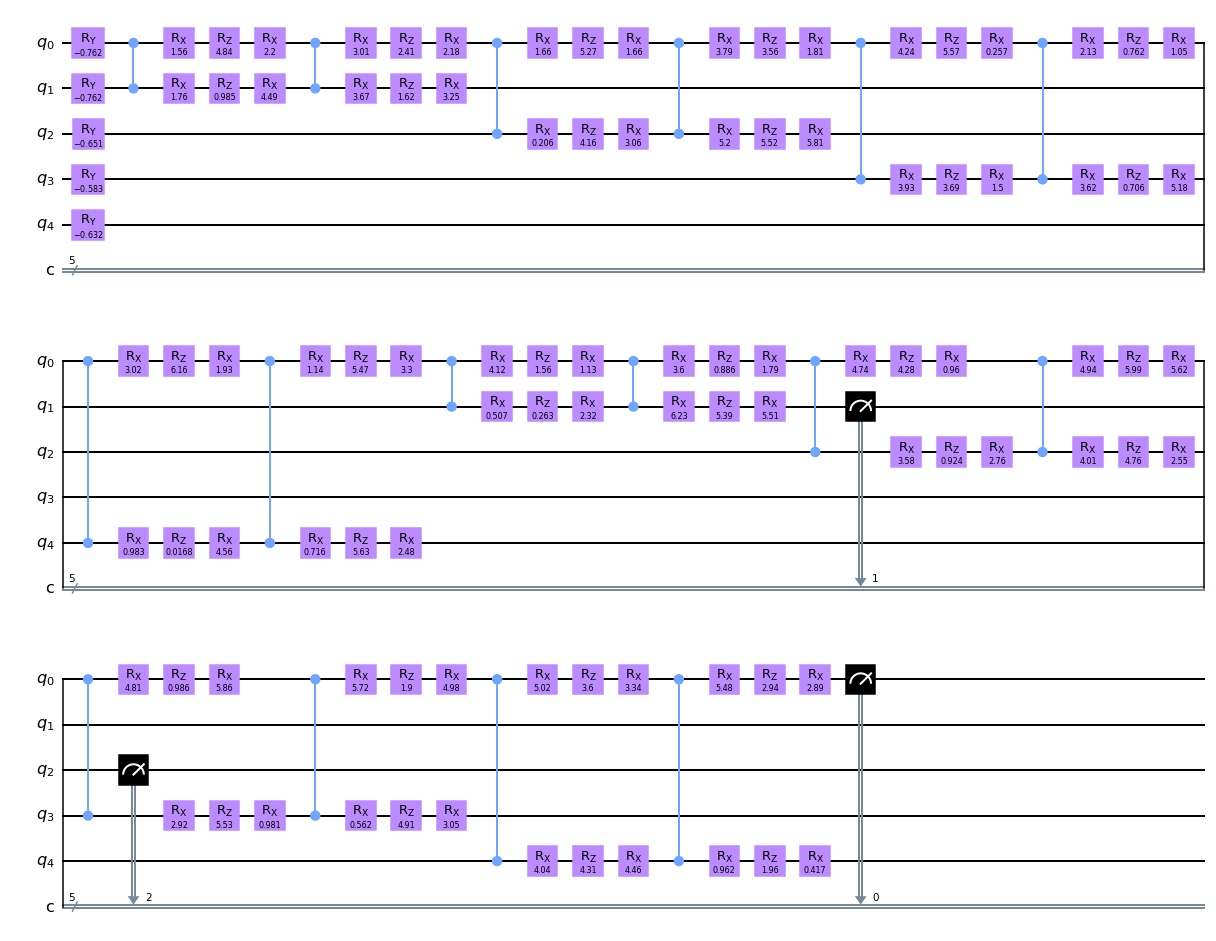

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


result is zero
[0.05 0.04 0.26 0.06 0.23 0.06 0.13 0.17]


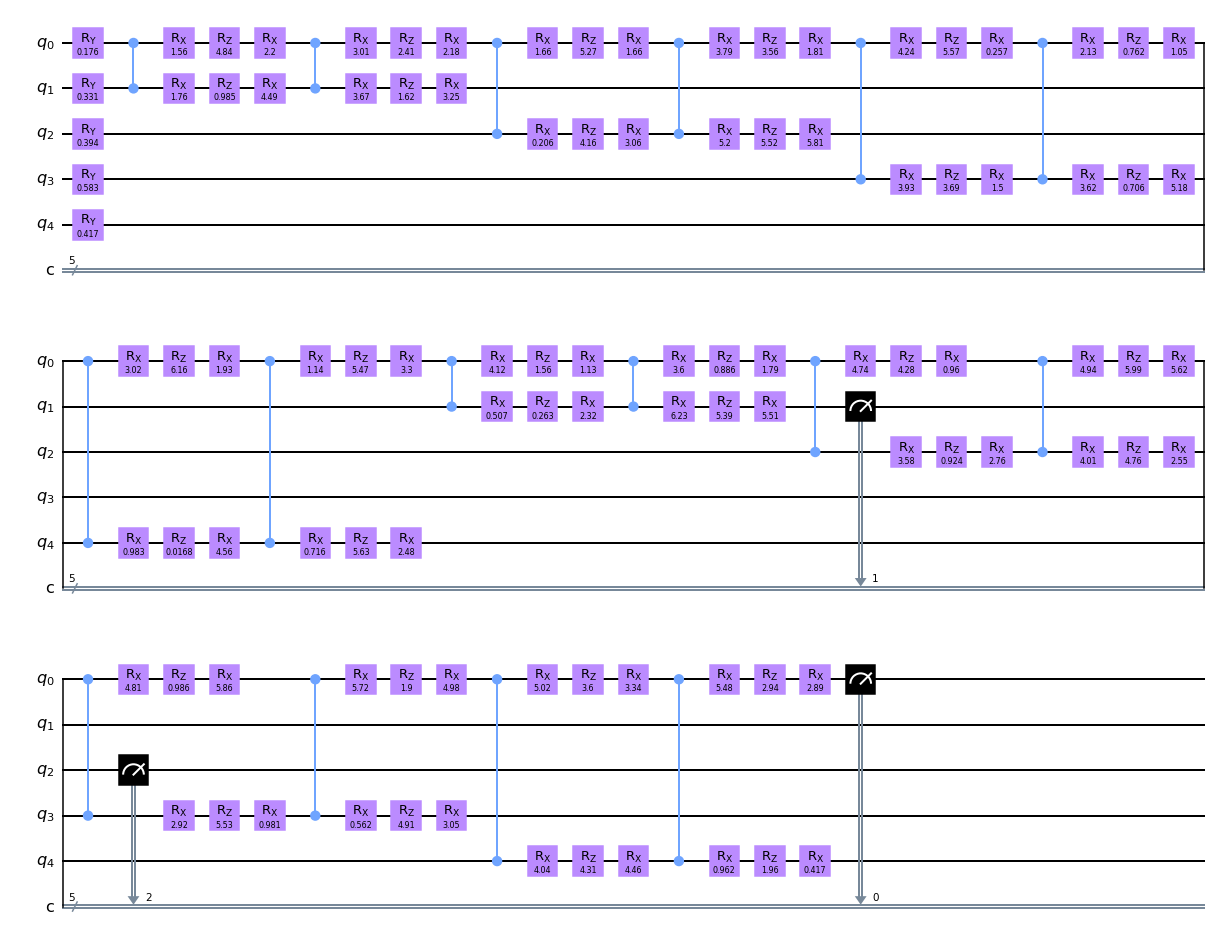

result is zero
[0.21 0.02 0.23 0.06 0.21 0.06 0.11 0.1 ]


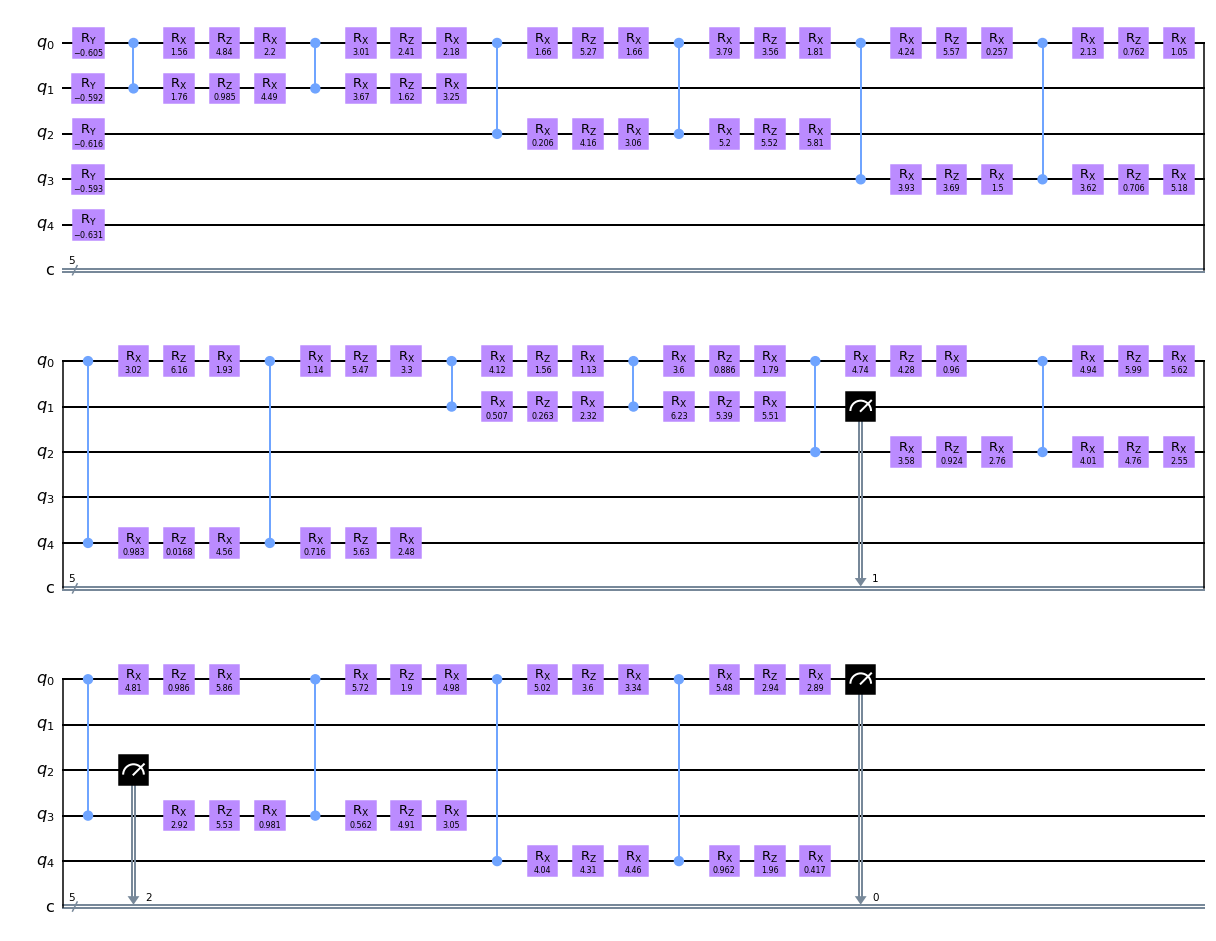

result is zero
[0.02 0.07 0.16 0.2  0.21 0.13 0.03 0.18]


In [12]:
# for e in range(epochs): 
for tr in range(3):  # looping over all training samples - 'samples' goes here - 2 used to limit iterations
    
    qc=q.QuantumCircuit(Qnum,c)
    
    def initializeCircuit():  
        for i in range(Qnum):
            qc.ry(np.tanh(xt[i,tr]),i)
        
        
    def ConnectCircuit(a,b,i,r):  
        qc.cz(a,b)
        
        qc.rx(ranVal[i][0][r],a)
        qc.rz(ranVal[i][1][r],a)
        qc.rx(ranVal[i][2][r],a)
    
        qc.rx(ranVal[i][3][r],b)
        qc.rz(ranVal[i][4][r],b)
        qc.rx(ranVal[i][5][r],b)
    
        qc.cz(a,b)
        
        qc.rx(ranVal[i][6][r],a)
        qc.rz(ranVal[i][7][r],a)
        qc.rx(ranVal[i][8][r],a)
    
        qc.rx(ranVal[i][9][r],b)
        qc.rz(ranVal[i][10][r],b)
        qc.rx(ranVal[i][11][r],b)
    
    initializeCircuit()

    for r in range(2):
        for i in range(Qnum-1):
            a=0
            b=i+1
            ConnectCircuit(a,b,i,r)
            
    q0=qc.measure(0,0)
    q1=qc.measure(1,1)
    q1=qc.measure(2,2)

    display(qc.draw(output="mpl"))


    # Drawing the histogram
    backend = q.Aer.get_backend('qasm_simulator')
    job = q.execute(qc, backend, shots=NUM_SHOTS)
    result = job.result().get_counts(qc)

    try:
        print(result['100'])
        
    except:
        print('result is zero')
    
    print(get_probability_distribution(result))